## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

AUTHOR:  RUPESH KUMAR JHA

In [1]:
#IMPORTING LIBRARY
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# (Q) how many data-points and features?
data.shape

(25, 2)

In [4]:
#(Q) What are the column names in our dataset?
data.columns

Index(['Hours', 'Scores'], dtype='object')

Now we can plot the data and find relation between the data.For this we will use scatter plot

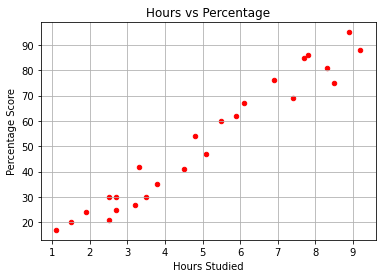

In [5]:
data.plot.scatter(x='Hours', y='Scores',color='red')
plt.grid()
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

from above we can see that as the study more hours his score percentage also increases so we can say that there is linear relationship so we can use linear regression here

## Preparing the data

In [6]:
#divide data into X and Y
X=data.iloc[:,0:1].values
Y=data.iloc[:,1].values

### NOW WE WILL SPLIT THE GIVEN DATASET INTO TRAIN AND TEST DATASETS 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [8]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
#Predicting
y_pred = regressor.predict(x_test)

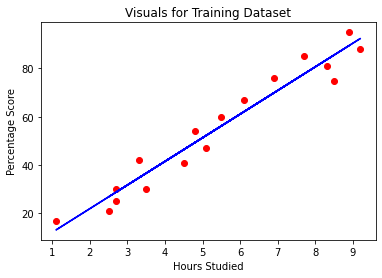

In [10]:
#Visualizing the training Test Results 
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

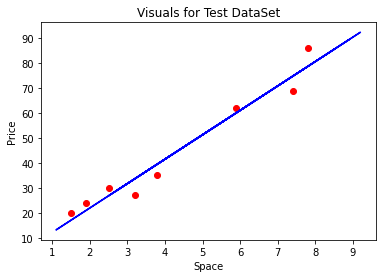

In [11]:
#Visualizing the Test Results 
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [13]:
#Calculate intercept and coefficient
print(regressor.intercept_)
print(regressor.coef_)

2.37081538234186
[9.78856669]


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027654


In [15]:
#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred)))

MSE :  22.965097212700417
RMSE :  4.792191274636314


Lesser the RMSE, better the model.

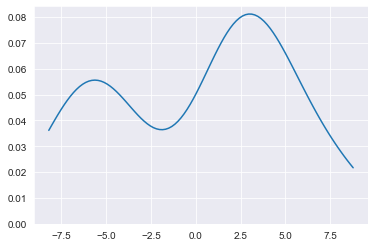

In [16]:
diff_of_ys=y_test-y_pred
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
#pdf plot
sns.kdeplot(np.array(diff_of_ys),bw=0.5)
plt.show()

observation: we can see that for houses of actual value>predicted or actual value<predicted is nearly same